In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
data_gender_sub=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
data_gender_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [3]:
data_gender_sub.shape


(418, 2)

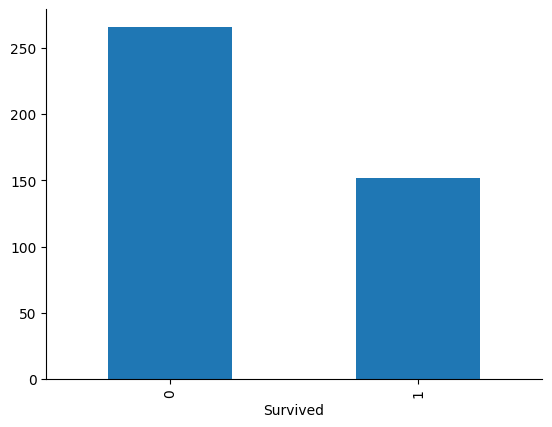

In [4]:
from matplotlib import pyplot as plt

# Assuming `data_gender_sub` is your DataFrame and it contains columns 'PassengerId' and 'Survived'

# Calculate counts for each category (for example, counts of survivors)
counts = data_gender_sub['Survived'].value_counts()

# Create bar plot
counts.plot(kind='bar')

# Hide top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()


In [5]:
data_gender_sub['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

clearly we are seeing survived rate is 1 lessthan 0

In [6]:
data_test=pd.read_csv("/kaggle/input/titanic/test.csv")
data_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data_train=pd.read_csv("/kaggle/input/titanic/train.csv")
data_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Keep a copy of PassengerId in the test_data for later use
test_passenger_id = data_test['PassengerId']
test_passenger_id.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

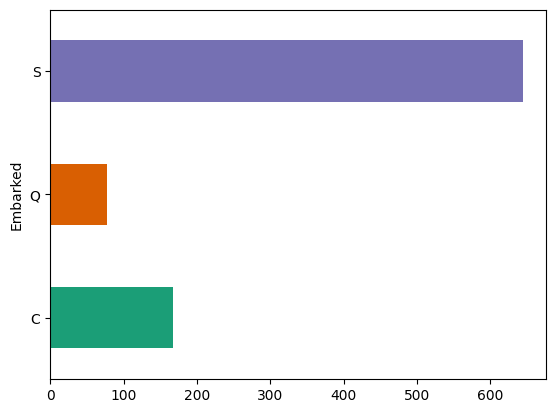

In [9]:
import seaborn as sns
data_train.groupby('Embarked').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(True)

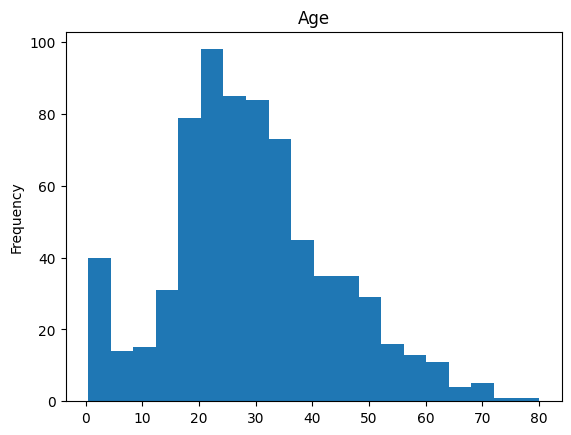

In [10]:
data_train['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(True)

In [11]:
data_train.head()
data_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

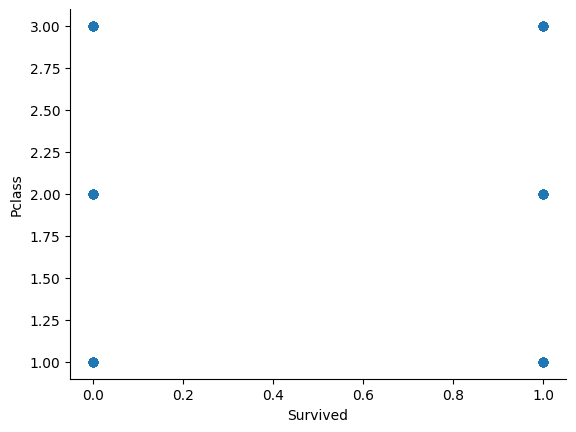

In [12]:
data_train.plot(kind='scatter', x='Survived', y='Pclass', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
import plotly.express as px
# data_train.groupby('Sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# plt.gca().spines[['top', 'right',]].set_visible(False)
fig = px.bar(counts, x=counts.index, y=counts.values, labels={'x': 'Sex', 'y': 'Count'},
             color=counts.index, color_discrete_map={'Male': 'blue', 'Female': 'orange'},
             title='Count of Passengers by Sex')
fig.update_layout(xaxis={'categoryorder':'total descending'})  # Optional: Order bars by total count
fig.show()


In [14]:
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

counts = data_train['Sex'].value_counts()

# Define custom colors for 'Male' and 'Female'
custom_colors = {
    'Male': 'rgb(31, 119, 180)',   # blue
    'Female': 'rgb(255, 127, 14)'  # orange
}

# Create bar plot using Plotly Express
fig = px.bar(counts, y=counts.index, x=counts.values, labels={'y': 'Sex', 'x': 'Count'},
             color=counts.index, color_discrete_map=custom_colors,
             orientation='h', title='Count of Passengers by Sex')
fig.update_layout(showlegend=False)  # Optional: Hide legend
fig.show()


In [15]:
data_train.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

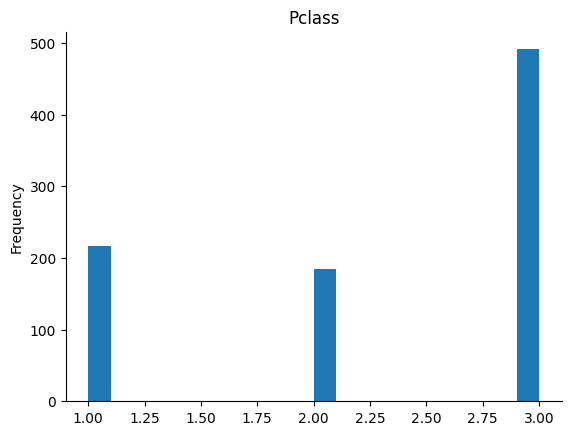

In [16]:
data_train['Pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [17]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# Fill missing values for numeric columns only
numeric_cols = data_train.select_dtypes(include=['float64', 'int64']).columns
data_train[numeric_cols] = data_train[numeric_cols].fillna(data_train[numeric_cols].mean())

In [20]:
data_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [21]:
non_numeric_cols = data_train.select_dtypes(exclude=['float64', 'int64']).columns

In [22]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
combined_data = pd.concat([data_train, data_test], sort=False)

In [24]:
combined_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [26]:
# Fill missing values for 'Age' and 'Fare' with the median
combined_data = combined_data.assign(Age=combined_data['Age'].fillna(combined_data['Age'].median()))
combined_data = combined_data.assign(Fare=combined_data['Fare'].fillna(combined_data['Fare'].median()))

In [27]:
# Fill missing values for 'Embarked' with the most common value
combined_data = combined_data.assign(Embarked=combined_data['Embarked'].fillna(combined_data['Embarked'].mode()[0]))

In [28]:
# For 'Cabin', we'll fill missing values with 'Unknown' and create a new feature indicating the presence of a cabin
combined_data = combined_data.assign(Cabin=combined_data['Cabin'].fillna('Unknown'))
combined_data = combined_data.assign(Has_Cabin=combined_data['Cabin'].apply(lambda x: 0 if x == 'Unknown' else 1))

In [29]:
# Encode categorical variables
label_encoder = LabelEncoder()
combined_data['Sex'] = label_encoder.fit_transform(combined_data['Sex'])
combined_data['Embarked'] = label_encoder.fit_transform(combined_data['Embarked'])

In [30]:
# Drop unnecessary columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
combined_data.drop(columns=columns_to_drop, inplace=True)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
# Assuming combined_data is your DataFrame with the features and 'Survived' as the target
# Drop rows with missing target values
combined_data = combined_data.dropna(subset=['Survived'])

# Define features and target
X = combined_data.drop('Survived', axis=1)
y = combined_data['Survived']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
# Train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
# Predict on the test data
y_pred = logreg.predict(X_test)
# Evaluate model on training data (since test data has no target variable)
train_logi = logreg.predict(X_train)
accuracy_logi = accuracy_score(y_train,train_logi)
print(f"Logistic Regression Accuracy: {accuracy_logi * 100:.2f}%")

Logistic Regression Accuracy: 80.06%


In [38]:
from xgboost import XGBClassifier
xgboost=XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgboost.fit(X_train, y_train)
y_pred_xg=xgboost.predict(X_test)
train_xg=xgboost.predict(X_train)
accuracy_xg = accuracy_score(y_train, train_xg)
print(f"XGBoost Accuracy: {accuracy_xg * 100:.2f}%")

XGBoost Accuracy: 96.77%


In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Train a Naive Bayes model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Predict on the training set
train_predictions_nb = model_nb.predict(X_train)

# Predict on the test set
test_predictions_nb = model_nb.predict(X_test)

# Calculate accuracy on the training set
accuracy_nb_train = accuracy_score(y_train, train_predictions_nb)
print(f"Naive Bayes Accuracy on Training Set: {accuracy_nb_train * 100:.2f}%")

Naive Bayes Accuracy on Training Set: 79.07%


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Predict on the training set
train_predictions_rf = model_rf.predict(X_train)

# Predict on the test set
test_predictions_rf = model_rf.predict(X_test)

# Calculate accuracy on the training set
accuracy_rf_train = accuracy_score(y_train, train_predictions_rf)
print(f"Random Forest Accuracy on Training Set: {accuracy_rf_train * 100:.2f}%")

# Calculate accuracy on the test set
accuracy_rf_test = accuracy_score(y_test, test_predictions_rf)
print(f"Random Forest Accuracy on Test Set: {accuracy_rf_test * 100:.2f}%")

Random Forest Accuracy on Training Set: 98.46%
Random Forest Accuracy on Test Set: 80.45%
